In [1]:
# Standard Libraries


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.constants import h,k,c

In [2]:
# Plot settings


dark = True
if dark:
    sns.set_style('darkgrid')
    plt.rc("xtick", labelsize=16) # , top=True, direction="in"
    plt.rc("ytick", labelsize=16) # , right=True, direction="in"
else:
    plt.rc("xtick", labelsize=16, top=True, direction="in")
    plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", labelsize=18)
plt.rc("axes", titlesize=20)
plt.rc("legend", fontsize=16)
plt.rc("figure", figsize=(7, 5), titlesize=18)

In [12]:
# Functions


def make_ax(data, x, y, xlabel = 'x', ylabel = 'y', title = 'Title', figsize = (10, 10), label = None):
    # Make fig and ax
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot data
    ax.plot(data[x], data[y], label = label, color = 'black')

    # Set title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Return fig and ax
    return fig, ax


def plot_ax(ax, legend = False, grid = False, save = False, filename = 'default.pdf'):
    if grid:
        ax.grid()
    if legend:
        ax.legend(facecolor='white', edgecolor='black', shadow=True)
    if save:
        plt.savefig(filename)
    plt.show()


def polygon(x1,y1,x2,y2,c):
    ax = plt.gca()
    polygon = plt.Polygon( [ (x1,y1), (x2,y2), (x2,0), (x1,0) ], color=c, alpha=0.2 )
    ax.add_patch(polygon)

    
def add_sprectrum(ax, X, Y, cmap=plt.get_cmap("jet")):
    N  = len(X)

    for n, (x, y) in enumerate(zip(X,Y)):
        color = cmap((x - 380)/(750 - 380))
        if n+1 == N: continue
        polygon(x,y,X[n+1],Y[n+1],color)
    
    return ax
        

def add_arrow(ax, x, y, up=True, name='Default', size=5, fontsize=12):
    if up:
        ax.arrow(x, y - size*1.5, dx=0, dy=size/3, head_width = size/3, head_length = size*0.65, 
                 width = size/10, facecolor='white', edgecolor='black')
        ax.text(x - len(name)*3, y - size*2.2, name, fontsize=fontsize)
    else:
        ax.arrow(x, y + size*3, dx=0, dy=-size, head_width = size/3, 
                 width = size/5, facecolor='white', edgecolor='black')
        ax.text(x - len(name)*2.5, y + size*3.3, name, fontsize=fontsize)
    return ax


def blackbody(x, T, A, a): # x = wavelength, T = temperature, A = fit amplitude constant
    x = x * 10**(-9) # nm --> m
    return A * (2*h*c**2)/((x - a)**5) * 1/(np.exp( (h*c)/((x - a)*k*T) ) - 1)

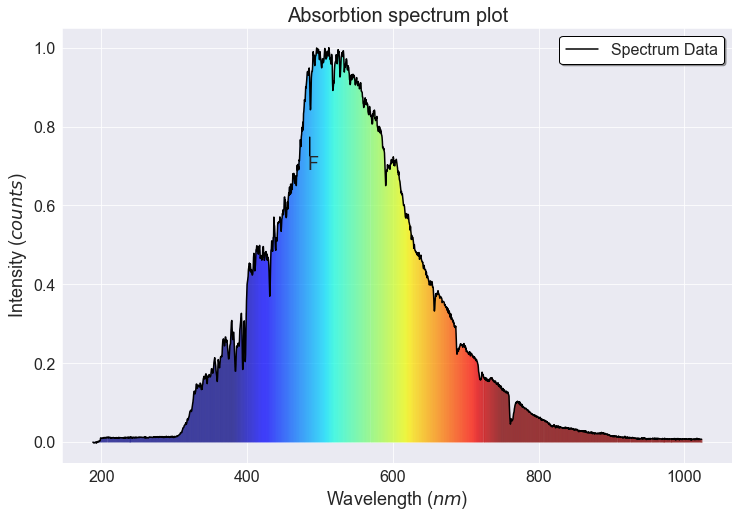

In [13]:
# Plot absorbtion sprectrum data


# Load in data
df = pd.read_csv('../Cleaned_Data/Absorbtion_data/absorbtion_spectrum_sunlight_data_cleaned.csv')


# Normalise counts of intensity such that counts density = counts / max count
max_counts = df['Intensity'].max()
df['Intensity'] = [x / max_counts for x in list(df['Intensity'])]


# Make ax and fig for plotting data
fig, ax = make_ax(df, x='Wavelength', y='Intensity', title='Absorbtion spectrum plot',
                 figsize=(12,8), xlabel='Wavelength ($nm$)', ylabel=r'Intensity ($counts$)',
                 label='Spectrum Data')


# Add spectrum
ax = add_sprectrum(ax, df['Wavelength'], df['Intensity'])


# Add arrow
ax = add_arrow(ax, 486, 0.8, up=True, name='F', size=0.05, fontsize=18)


# Plot figure
brigtness = 'dark' if dark else 'light'
plot_ax(ax, legend=True, grid=(not dark), save=False, filename=f'../../../Final_graphs/absorbtion_spectrum_plot_{brigtness}.pdf')

C:\Users\jessh\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-3-8d5732193523>:61: RuntimeWarning: overflow encountered in exp
  return A * (2*h*c**2)/((x - a)**5) * 1/(np.exp( (h*c)/((x - a)*k*T) ) - 1)


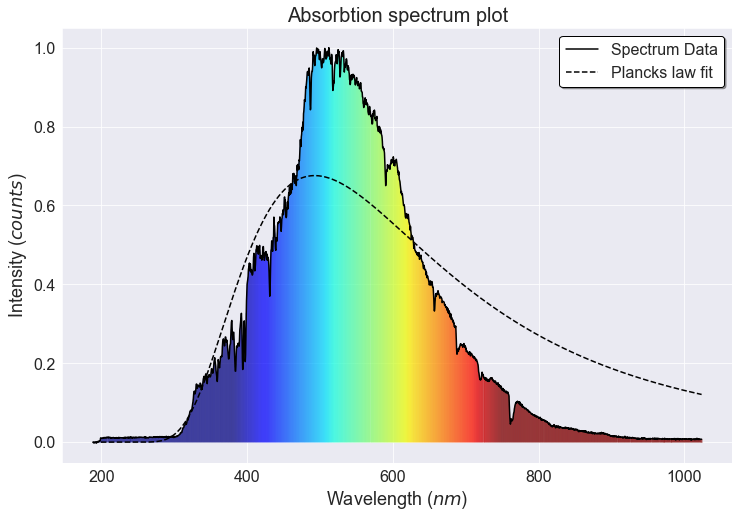

In [5]:
# Plot absorbtion spectrum data and also plot a fit for plancks blackbody radiation law


# Make ax and fig for plotting data
fig, ax = make_ax(df, x='Wavelength', y='Intensity', title='Absorbtion spectrum plot',
                 figsize=(12,8), xlabel='Wavelength ($nm$)', ylabel=r'Intensity ($counts$)',
                 label='Spectrum Data')


# Add spectrum
ax = add_sprectrum(ax, df['Wavelength'], df['Intensity'])


# Add blackbody radiation fit
popt, pcov = curve_fit(blackbody, df['Wavelength'], 
                       df['Intensity'], p0=[9500, 100, 0.000000003],
                      absolute_sigma=True, 
                       sigma=[1000 for x in range(len(df['Wavelength']))])
T, A, a = popt


# Plot blackbody fit
wavelengths = df['Wavelength'].to_numpy()
blackbody_fit_y = blackbody(wavelengths, T, A, a)
ax.plot(wavelengths, blackbody_fit_y, ls='--', c='black', label='Plancks law fit')


# Plot figure
brigtness = 'dark' if dark else 'light'
plot_ax(ax, legend=True, grid=(not dark), save=False, filename=f'../../../Final_graphs/absorbtion_spectrum_blackbody_fit_{brigtness}.pdf')